# DATA LOAD

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/test.csv')

In [ ]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [ ]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


# 전처리

In [ ]:
train = train_df.copy() ## 데이터 복사
test = test_df.copy()

## payload 결측치 관련 파생변수

In [ ]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [ ]:
#=============================================================================
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값
#=============================================================================

train['ip_src'].fillna(-1, inplace=True)
train['ip_dst'].fillna(-1, inplace=True)

train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [ ]:
test['ip_src'].fillna(-1, inplace=True)
test['ip_dst'].fillna(-1, inplace=True)

test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화

In [ ]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [ ]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

## 추가 파생변수

송수신 TCP 윈도우 초기값의 비율

In [ ]:
train['tcp_win_ratio'] = train['tcp_win_fwd_init'] / (train['tcp_win_bwd_init'] + 1e-5) # 0으로 나누는 것 방지
test['tcp_win_ratio'] = test['tcp_win_fwd_init'] / (test['tcp_win_bwd_init'] + 1e-5)

port 클러스터링 파생변수

In [ ]:
from sklearn.cluster import KMeans

port_dst_train = train_df[['port_dst']].fillna(-1)
port_dst_test = test_df[['port_dst']].fillna(-1)

kmeans = KMeans(n_clusters=6, random_state=156)
train['port_dst_cluster'] = kmeans.fit_predict(port_dst_train)
test['port_dst_cluster'] = kmeans.predict(port_dst_test)

패킷 간 평균 간격 시간이 극단적으로 짧거나 긴 파생변수

In [ ]:
# Q1 = train['iat_avg_packets'].quantile(0.25)
# Q3 = train['iat_avg_packets'].quantile(0.75)
# IQR = Q3 - Q1

# low_threshold = Q1 - 1.5 * IQR
# high_threshold = Q3 + 1.5 * IQR

# train['is_iat_low'] = (train['iat_avg_packets'] < low_threshold).astype(int)
# train['is_iat_high'] = (train['iat_avg_packets'] > high_threshold).astype(int)

# Q1 = test['iat_avg_packets'].quantile(0.25)
# Q3 = test['iat_avg_packets'].quantile(0.75)
# IQR = Q3 - Q1

# low_threshold = Q1 - 1.5 * IQR
# high_threshold = Q3 + 1.5 * IQR

# test['is_iat_low'] = (test['iat_avg_packets'] < low_threshold).astype(int)
# test['is_iat_high'] = (test['iat_avg_packets'] > high_threshold).astype(int)

IP별 송수신 통합 빈도

In [ ]:
all_ips = pd.concat([train['ip_src'], train['ip_dst']])
ip_total_freq = all_ips.value_counts()

train['ip_src_total_freq'] = train['ip_src'].map(ip_total_freq)
train['ip_dst_total_freq'] = train['ip_dst'].map(ip_total_freq)

test['ip_src_total_freq'] = test['ip_src'].map(ip_total_freq).fillna(0)
test['ip_dst_total_freq'] = test['ip_dst'].map(ip_total_freq).fillna(0)

TCP push packet의 수가 극단적으로 많은 파생변수

In [ ]:
Q1 = train['tcp_psh_count'].quantile(0.25)
Q3 = train['tcp_psh_count'].quantile(0.75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR

train['tcp_psh_anomaly'] = (train['tcp_psh_count'] > threshold).astype(int)

Q1 = test['tcp_psh_count'].quantile(0.25)
Q3 = test['tcp_psh_count'].quantile(0.75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR

test['tcp_psh_anomaly'] = (test['tcp_psh_count'] > threshold).astype(int)

duration이 극단적으로 긴 파생변수

In [ ]:
# Q1 = train['duration'].quantile(0.25)
# Q3 = train['duration'].quantile(0.75)
# IQR = Q3 - Q1

# train['is_duration_long'] = (train['duration'] > Q3 + 1.5 * IQR).astype(int)

# Q1 = test['duration'].quantile(0.25)
# Q3 = test['duration'].quantile(0.75)
# IQR = Q3 - Q1

# test['is_duration_long'] = (test['duration'] > Q3 + 1.5 * IQR).astype(int)

송수신 방향 전송량 및 duration 대비 전송량 (속도 개념)

In [ ]:
# 송신 전송량
bytes_fwd = train['pkt_count_fwd'] * train['payload_fwd_mean']
# 수신 전송량
bytes_bwd = train['pkt_count_bwd'] * train['payload_bwd_mean']

train['bytes_fwd'] = bytes_fwd
train['bytes_bwd'] = bytes_bwd

# 전체 전송량
total_bytes = bytes_fwd + bytes_bwd

train['total_bytes'] = total_bytes

# duration 대비 전송량 (초당 전송 바이트)
train['bytes_per_sec'] = total_bytes / (train['duration'] + 1e-5)  # ZeroDivision 방지

In [ ]:
# 송신 전송량
bytes_fwd_test = test['pkt_count_fwd'] * test['payload_fwd_mean']
# 수신 전송량
bytes_bwd_test = test['pkt_count_bwd'] * test['payload_bwd_mean']

test['bytes_fwd'] = bytes_fwd_test
test['bytes_bwd'] = bytes_bwd_test

# 전체 전송량
total_bytes_test = bytes_fwd + bytes_bwd

test['total_bytes'] = total_bytes_test

# duration 대비 전송량 (초당 전송 바이트)
test['bytes_per_sec'] = total_bytes_test / (test['duration'] + 1e-5)  # ZeroDivision 방지

duration 대비 패킷 수 (패킷 밀도)

In [ ]:
# 전체 패킷 수
total_packets = train['pkt_count_fwd'] + train['pkt_count_bwd']
# 초당 패킷 수 (패킷 밀도)
train['packets_per_sec'] = total_packets / (train['duration'] + 1e-5)

# 전체 패킷 수
total_packets_test = test['pkt_count_fwd'] + test['pkt_count_bwd']
# 초당 패킷 수 (패킷 밀도)
test['packets_per_sec'] = total_packets_test / (test['duration'] + 1e-5)

In [ ]:
# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

TCP flag

In [ ]:
train['tcp_flag_sum'] = train['tcp_syn_count'] + train['tcp_psh_count'] + train['tcp_rst_count']
train['tcp_flag_ratio_syn'] = train['tcp_syn_count'] / (train['tcp_flag_sum'] + 1e-5)
train['tcp_flag_ratio_psh'] = train['tcp_psh_count'] / (train['tcp_flag_sum'] + 1e-5)
train['tcp_flag_ratio_rst'] = train['tcp_rst_count'] / (train['tcp_flag_sum'] + 1e-5)

test['tcp_flag_sum'] = test['tcp_syn_count'] + test['tcp_psh_count'] + test['tcp_rst_count']
test['tcp_flag_ratio_syn'] = test['tcp_syn_count'] / (test['tcp_flag_sum'] + 1e-5)
test['tcp_flag_ratio_psh'] = test['tcp_psh_count'] / (test['tcp_flag_sum'] + 1e-5)
test['tcp_flag_ratio_rst'] = test['tcp_rst_count'] / (test['tcp_flag_sum'] + 1e-5)

payload 평균 비율 파생변수

In [ ]:
train['payload_ratio'] = train['payload_fwd_mean'] / (train['payload_bwd_mean'] + 1e-5)

test['payload_ratio'] = test['payload_fwd_mean'] / (test['payload_bwd_mean'] + 1e-5)

추가 파생변수 (현경)

In [ ]:
from scipy.stats.mstats import winsorize

# a) iat_avg_packets: 윈저라이징(상·하위 1%)
train['iat_avg_packets_clipped'] = winsorize(train['iat_avg_packets'], limits=(0.01, 0.01))
test['iat_avg_packets_clipped'] = winsorize(test['iat_avg_packets'], limits=(0.01, 0.01))

# duration: 이미 'duration'에 대해 윈저라이징/스케일링이 필요시
# 윈저라이징 (상·하위 1%)
train['duration_clipped'] = winsorize(train['duration'], limits=(0.01, 0.01))
test['duration_clipped'] = winsorize(test['duration'], limits=(0.01, 0.01))


epsilon = 1e-6  # 분모가 0일 때 안정성 확보

# interaction term (duration × pkt_count_fwd)
train['duration_pkt_fwd_interaction'] = train['duration'] * train['pkt_count_fwd']
test['duration_pkt_fwd_interaction'] = test['duration'] * test['pkt_count_fwd']

train['rate_bytes_diff'] = np.abs(train['rate_fwd_bytes'] - train['rate_bwd_bytes'])
train['duration_rate_fwd_pkts_interaction'] = train['duration'] * train['rate_fwd_pkts']

test['rate_bytes_diff'] = np.abs(test['rate_fwd_bytes'] - test['rate_bwd_bytes'])
test['duration_rate_fwd_pkts_interaction'] = test['duration'] * test['rate_fwd_pkts']

## 변수 삭제

In [ ]:
#=============================================================================
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)
#=============================================================================

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [ ]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio',
    'tcp_win_ratio',

    'rate_fwd_pkts',
    'rate_bwd_pkts',
    'bytes_fwd',
    'bytes_bwd',
    'total_bytes',
    'bytes_per_sec',
    'packets_per_sec',
    'tcp_flag_ratio_syn',
    'tcp_flag_ratio_psh',
    'tcp_flag_ratio_rst',
    'payload_ratio',
    'iat_avg_packets_clipped',
    'duration_clipped',
    'duration_pkt_fwd_interaction',
    'rate_bytes_diff',
    'duration_rate_fwd_pkts_interaction',
]

for col in log_cols:
    train[col] = np.log1p(train[col])

for col in log_cols:
    test[col] = np.log1p(test[col])

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio',
    'tcp_win_ratio',

    'rate_fwd_pkts',
    'rate_bwd_pkts',
    'bytes_fwd',
    'bytes_bwd',
    'total_bytes',
    'bytes_per_sec',
    'packets_per_sec',
    'tcp_flag_ratio_syn',
    'tcp_flag_ratio_psh',
    'tcp_flag_ratio_rst',
    'payload_ratio',
    'iat_avg_packets_clipped',
    'duration_clipped',
    'duration_pkt_fwd_interaction',
    'rate_bytes_diff',
    'duration_rate_fwd_pkts_interaction',
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## One-Hot Encoding

In [ ]:
train = pd.get_dummies(data=train, columns=['protocol'],
                       prefix=['protocol'])
test = pd.get_dummies(data=test, columns=['protocol'],
                       prefix=['protocol'])

In [ ]:
train = train.drop(columns=['protocol_UDP'],axis=1)
test = test.drop(columns=['protocol_UDP'],axis=1)

## LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# target 변수
le_attack = LabelEncoder()
train['attack_type'] = le_attack.fit_transform(train['attack_type']) # attack_type is only in train

# Feature
le_post = LabelEncoder()
le_post.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())
train['port_dst_cat'] = le_post.transform(train['port_dst_cat'].astype(str))
test['port_dst_cat'] = le_post.transform(test['port_dst_cat'].astype(str))

## X, Y 데이터 분리

In [ ]:
# Features
X = train.drop('attack_type',axis=1)

# Target
y = train['attack_type'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

## LightGBM

Fold 1
Fold 1 Macro F1 Score: 0.8209
Fold 2
Fold 2 Macro F1 Score: 0.8165
Fold 3
Fold 3 Macro F1 Score: 0.8242
Fold 4
Fold 4 Macro F1 Score: 0.7951
Fold 5
Fold 5 Macro F1 Score: 0.9103
Overall OOF Macro F1 Score: 0.8381


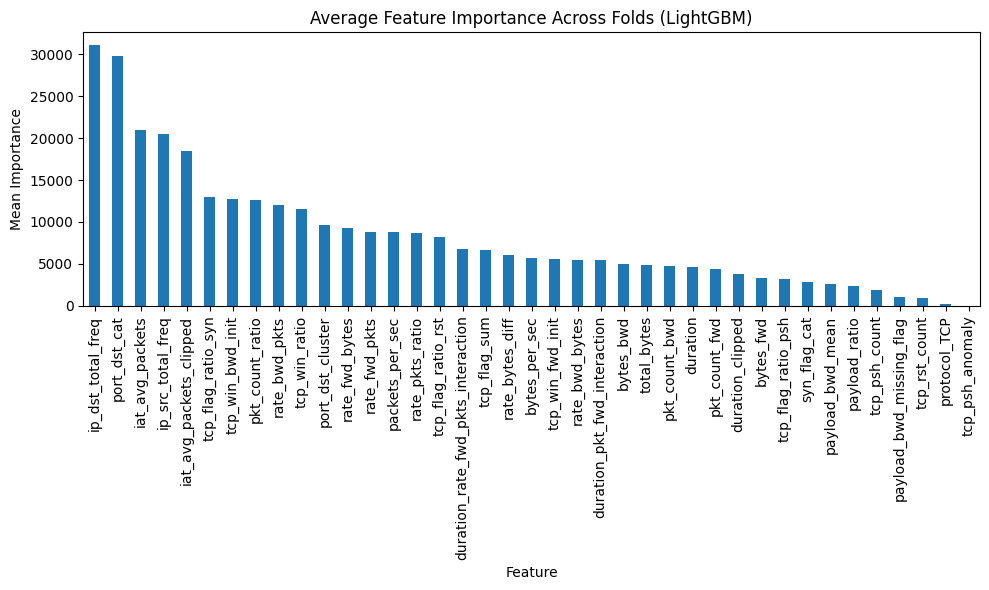

In [ ]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, weights))

feature_importances = []

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=156)

oof_preds = np.zeros(len(train), dtype=int)
test_preds = np.zeros((n_splits, len(test)), dtype=int)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}")
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val, y_val = X.iloc[val_idx], y[val_idx]

    model = LGBMClassifier(
        class_weight=class_weight_dict,
        n_estimators=1000,
        num_leaves=64,
        learning_rate=0.01,
        max_depth=6,
        random_state=156,
        objective='multiclass',
        device='gpu',
        verbose=-1,
        n_jobs=-1,
        # boost_from_average=False
        num_class=len(np.unique(y))  # 다중분류 클래스 수 자동 계산
    )

    model.fit(X_train, y_train)

    # Feature Importance 저장
    fold_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    })
    feature_importances.append(fold_importance)

    # 검증 예측
    val_pred = model.predict(X_val)
    oof_preds[val_idx] = val_pred

    fold_f1 = f1_score(y_val, val_pred, average='macro')
    print(f"Fold {fold+1} Macro F1 Score: {fold_f1:.4f}")

    # 테스트 예측 저장
    test_preds[fold] = model.predict(test)

# 최종 테스트 예측: 다수결
final_test_preds, _ = mode(test_preds, axis=0)
final_test_preds = final_test_preds.flatten()

# 전체 OOF macro F1
total_f1 = f1_score(y, oof_preds, average='macro')
print(f"Overall OOF Macro F1 Score: {total_f1:.4f}")

# 전체 피처 중요도 시각화
fi_df = pd.concat(feature_importances)
mean_fi = fi_df.groupby('feature')['importance'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mean_fi.plot(kind='bar')
plt.title('Average Feature Importance Across Folds (LightGBM)')
plt.ylabel('Mean Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/sample_submission.csv')


submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': final_test_preds
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('lgbm_original.csv', index=False)